#Imports

In [115]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from PIL import Image

#Loading Data

In [116]:
x_train_all = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/MNIST/digit_xtrain.csv', delimiter=',', dtype=int)
y_train_all = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/MNIST/digit_ytrain.csv', dtype=int)

x_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/MNIST/digit_xtest.csv', delimiter=',', dtype=int)
y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/MNIST/digit_ytest.csv', dtype=int)

#Preprocessing

In [117]:
#rescaling
x_train_all, x_test = x_train_all/255, x_test/255

In [118]:
#target one-hot-Encoding

y_train_all = np.eye(10)[y_train_all]
y_test =  np.eye(10)[y_test]

In [119]:
x_val = x_train_all[:10000]
x_train = x_train_all[10000:]

y_val = y_train_all[:10000]
y_train = y_train_all[10000:]

In [120]:
y_val.shape

(10000, 10)

#Setup Tensorflow

In [121]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

#Neural Network Architecture

In [122]:
"""initial_w1 = tf.random.truncated_normal(shape=(input_dim, nr_hidden_1), stddev=0.1, seed=42)
initial_b1 = tf.constant(value=0.0, shape=[nr_hidden_1])

w1 = tf.Variable(initial_value=initial_w1)
b1 = tf.Variable(initial_value=initial_b1)

matmul_1_c = tf.matmul(X, w1) + b1
output_1 = tf.nn.relu(matmul_1_c)"""

'initial_w1 = tf.random.truncated_normal(shape=(input_dim, nr_hidden_1), stddev=0.1, seed=42)\ninitial_b1 = tf.constant(value=0.0, shape=[nr_hidden_1])\n\nw1 = tf.Variable(initial_value=initial_w1)\nb1 = tf.Variable(initial_value=initial_b1)\n\nmatmul_1_c = tf.matmul(X, w1) + b1\noutput_1 = tf.nn.relu(matmul_1_c)'

#Model 1

In [123]:
input_dim = 28 * 28 * 1
nr_hidden_1 = 512
nr_hidden_2 = 64
nr_output_layer = 10

In [124]:
def layers(input, input_dim, output_dim, name):
    initial_w = tf.random.truncated_normal(shape=(input_dim, output_dim), stddev=0.1, seed=42)
    initial_b = tf.constant(value=0.0, shape=[output_dim])

    w = tf.Variable(initial_value=initial_w)
    b = tf.Variable(initial_value=initial_b)
    matmul_c = tf.matmul(input, w) + b

    if name=='out':
        output = tf.nn.softmax(matmul_c)
    else:
        output = tf.nn.relu(matmul_c)

    return output

In [125]:
layer_1 = layers(input=X, input_dim=input_dim, output_dim=nr_hidden_1, name='layer_1')
layer_2 = layers(input=layer_1, input_dim=nr_hidden_1, output_dim=nr_hidden_2, name='layer_2')
output = layers(input=layer_2, input_dim=nr_hidden_2, output_dim=nr_output_layer, name='out')

#Loss and Optimizer model 1




In [126]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=output))

In [127]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
train_step =  optimizer.minimize(loss)

In [128]:
correct_pred = tf.equal(tf.argmax(output, axis=1), tf.argmax(Y, axis=1))
accuracy  = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

#Run Session

In [129]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [130]:
def next_batch(size_of_batch, x, y, step):


    start = step * size_of_batch
    end = start + size_of_batch

    return x[start:end], y[start:end]


#Training model 1 (without dropout)

In [131]:
epoches = 15
size_of_batch = 1000
nr_iteration = int(y_train.shape[0]/size_of_batch)

train_accuracy_1 = []
valid_accuracy_1 = []
train_loss_1 = []
valid_loss_1 = []

for i in range(epoches):

    for s in range(nr_iteration):
        x_batch, y_batch = next_batch(size_of_batch=size_of_batch, x=x_train, y=y_train, step=s)

        feed_dictionary_train = {X:x_batch, Y:y_batch}
        feed_dictionary_val = {X:x_val, Y:y_val}

        sess.run(train_step, feed_dict=feed_dictionary_train)
    batch_accuracy, batch_loss = sess.run([accuracy, loss], feed_dictionary_train)
    val_accuracy, val_loss = sess.run([accuracy, loss], feed_dict=feed_dictionary_val)

    train_accuracy_1.append(batch_accuracy)
    train_loss_1.append(batch_loss)
    valid_accuracy_1.append(val_accuracy)
    valid_loss_1.append(val_loss)

    print(f'Epoch {i} train_Accuracy {batch_accuracy:.3f}  val_accuracy {val_accuracy:.3f} | train_loss {batch_loss:.2f} val_loss {val_loss:.2f}')

Epoch 0 train_Accuracy 0.859  val_accuracy 0.827 | train_loss 1.61 val_loss 1.65
Epoch 1 train_Accuracy 0.867  val_accuracy 0.845 | train_loss 1.60 val_loss 1.62
Epoch 2 train_Accuracy 0.871  val_accuracy 0.855 | train_loss 1.59 val_loss 1.61
Epoch 3 train_Accuracy 0.875  val_accuracy 0.861 | train_loss 1.59 val_loss 1.60
Epoch 4 train_Accuracy 0.877  val_accuracy 0.863 | train_loss 1.59 val_loss 1.60
Epoch 5 train_Accuracy 0.966  val_accuracy 0.944 | train_loss 1.50 val_loss 1.53
Epoch 6 train_Accuracy 0.985  val_accuracy 0.956 | train_loss 1.48 val_loss 1.51
Epoch 7 train_Accuracy 0.985  val_accuracy 0.961 | train_loss 1.48 val_loss 1.50
Epoch 8 train_Accuracy 0.984  val_accuracy 0.964 | train_loss 1.48 val_loss 1.50
Epoch 9 train_Accuracy 0.987  val_accuracy 0.965 | train_loss 1.48 val_loss 1.50
Epoch 10 train_Accuracy 0.987  val_accuracy 0.965 | train_loss 1.48 val_loss 1.50
Epoch 11 train_Accuracy 0.988  val_accuracy 0.968 | train_loss 1.48 val_loss 1.50
Epoch 12 train_Accuracy 0.

#Model 2 (with dropout)

In [132]:
layer_1 = layers(input=X, input_dim=input_dim, output_dim=nr_hidden_1, name='layer_1')
dropout_layer = tf.nn.dropout(x=layer_1, keep_prob=0.6)
layer_2 = layers(input=dropout_layer, input_dim=nr_hidden_1, output_dim=nr_hidden_2, name='layer_2')
output_2 = layers(input=layer_2, input_dim=nr_hidden_2, output_dim=nr_output_layer, name='out')


loss_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=output_2))
optimizer_2 = tf.train.AdamOptimizer(learning_rate=1e-3)
train_step_2 = optimizer_2.minimize(loss_2)

correct_pred_2 = tf.equal(tf.argmax(Y, axis=1), tf.argmax(output_2, axis=1))
accuracy_2 = tf.reduce_mean(tf.cast(correct_pred_2, dtype=tf.float32))



#Run Session

In [133]:
sess_2 = tf.Session()
init_2 = tf.global_variables_initializer()
sess_2.run(init_2)

#Training Model 2

In [134]:
epoches = 15
batch_size=1000
nr_iters = int(y_train.shape[0]/batch_size)

train_accuracy_2 = []
train_loss_2 = []
valid_accuracy_2 = []
valid_loss_2 = []

for e in range(epoches):
    for i in range(nr_iters):
        x_batch, y_batch = next_batch(size_of_batch=batch_size, x=x_train, y=y_train, step=i)

        sess_2.run(train_step_2, feed_dict={X:x_batch, Y:y_batch})
    t_accuracy_2, t_loss_2 = sess_2.run([accuracy_2, loss_2], feed_dict={X:x_batch, Y:y_batch})
    val_accuracy_2, val_loss_2 = sess_2.run([accuracy_2, loss_2], feed_dict={X:x_val, Y:y_val})

    train_accuracy_2.append(t_accuracy_2)
    train_loss_2.append(t_loss_2)
    valid_accuracy_2.append(val_accuracy_2)
    valid_loss_2.append(val_loss_2)

    print(f'Epoch {e} train_Accuracy {t_accuracy_2:.3f}  val_accuracy {val_accuracy_2:.3f} | train_loss {t_loss_2:.2f} val_loss {val_loss_2:.2f}')



Epoch 0 train_Accuracy 0.833  val_accuracy 0.799 | train_loss 1.64 val_loss 1.67
Epoch 1 train_Accuracy 0.848  val_accuracy 0.830 | train_loss 1.62 val_loss 1.64
Epoch 2 train_Accuracy 0.860  val_accuracy 0.844 | train_loss 1.60 val_loss 1.62
Epoch 3 train_Accuracy 0.866  val_accuracy 0.849 | train_loss 1.60 val_loss 1.62
Epoch 4 train_Accuracy 0.875  val_accuracy 0.855 | train_loss 1.59 val_loss 1.61
Epoch 5 train_Accuracy 0.874  val_accuracy 0.862 | train_loss 1.59 val_loss 1.60
Epoch 6 train_Accuracy 0.872  val_accuracy 0.860 | train_loss 1.59 val_loss 1.60
Epoch 7 train_Accuracy 0.974  val_accuracy 0.948 | train_loss 1.49 val_loss 1.52
Epoch 8 train_Accuracy 0.982  val_accuracy 0.953 | train_loss 1.48 val_loss 1.51
Epoch 9 train_Accuracy 0.976  val_accuracy 0.959 | train_loss 1.49 val_loss 1.51
Epoch 10 train_Accuracy 0.985  val_accuracy 0.960 | train_loss 1.48 val_loss 1.50
Epoch 11 train_Accuracy 0.981  val_accuracy 0.964 | train_loss 1.48 val_loss 1.50
Epoch 12 train_Accuracy 0.

#Visualizing model performence

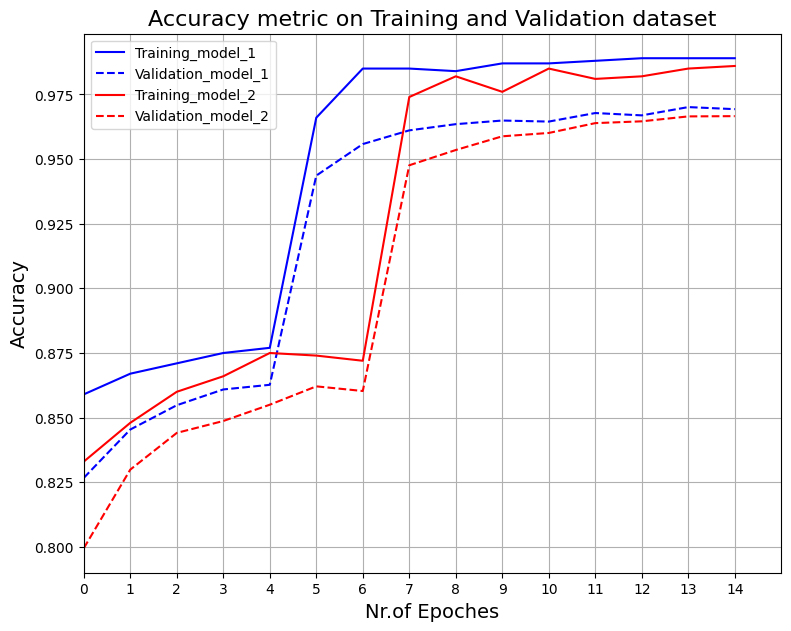

In [135]:
fig, ax = plt.subplots(figsize=(9, 7), ncols=1, nrows=1)
ax.plot(train_accuracy_1, label='Training_model_1', color='blue')
ax.plot(valid_accuracy_1, label='Validation_model_1', color='blue', ls='--')

ax.plot(train_accuracy_2, label='Training_model_2', color='red')
ax.plot(valid_accuracy_2, label='Validation_model_2', color='red', ls='--')


ax.set_title('Accuracy metric on Training and Validation dataset', fontsize=16)
ax.set_xlabel('Nr.of Epoches', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlim(0, epoches)
ax.set_xticks(range(epoches))
ax.grid()
plt.legend(['Training_model_1', 'Validation_model_1', 'Training_model_2', 'Validation_model_2'])
plt.show()

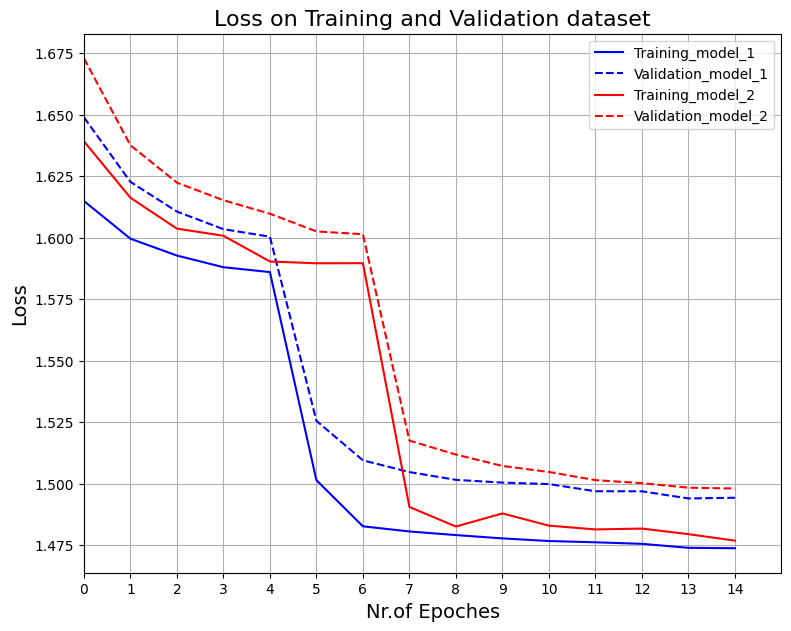

In [136]:
fig, ax = plt.subplots(figsize=(9, 7), ncols=1, nrows=1)
ax.plot(train_loss_1, label='Training_model_1', color='blue')
ax.plot(valid_loss_1, label='Validation_model_1', color='blue', ls='--')

ax.plot(train_loss_2, label='Training_model_2', color='red')
ax.plot(valid_loss_2, label='Validation_model_2', color='red', ls='--')

ax.set_title('Loss on Training and Validation dataset', fontsize=16)
ax.set_xlabel('Nr.of Epoches', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.set_xlim(0, epoches)
ax.set_xticks(range(epoches))
ax.grid()
plt.legend(['Training_model_1', 'Validation_model_1', 'Training_model_2', 'Validation_model_2'])
plt.show()

#ٍEvaluating model 2 on test data


In [155]:
test_correct_preds = tf.equal(tf.argmax(Y, axis=1), tf.argmax(output_2, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(test_correct_preds, dtype=tf.float32))

accuracy_t = sess_2.run(accuracy_test, {X:x_test, Y:y_test})
accuracy_t
print(f'Accuracy of model 2 (with dropout) on test data is {accuracy_t*100:.2f} %')

Accuracy of model 2 (with dropout) on test data is 96.67 %


In [162]:
prediction = np.argmax(sess_2.run(output_2, {X:x_test[146].reshape(1,-1)}))
prediction

8

In [163]:
array_to_img(x_test[146].reshape(28, 28, 1))

In [166]:
def implementation(img_path, threshold=155):

    img = Image.open(img_path)

    img = img.resize((28, 28))
    gray_img = img.convert('L')

    array_gray_img = img_to_array(gray_img)
    array_gray_img = array_gray_img.reshape(1,-1)

    blank = np.zeros(shape=(1, 784))
    for i in range(784):
        if array_gray_img[0][i] < threshold:
            blank[0][i] = 255
        else:
            blank[0][i] = 0
    blank = blank/255
    prediction = np.argmax(sess_2.run(output_2, {X:blank}))

    return prediction
